# Predicting 2020 Presidential Election

In [226]:
import pandas as pd
import numpy as np 
from pathlib import Path
%matplotlib inline

import panel as pn
from panel.interact import interact
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import hvplot.pandas
import scipy.stats as stats
from plotly import subplots
from plotly.subplots import make_subplots

init_notebook_mode(connected=True)
pn.extension("plotly")

In [124]:
polls_df = pd.read_csv(Path("Resources/president_polls.csv"))
polls_df.head()

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,...,nationwide_batch,ranked_choice_reallocated,created_at,notes,url,stage,answer,candidate_name,candidate_party,pct
0,116815,63513,2020,New Hampshire,1528,AtlasIntel,NaN,NaN,AtlasIntel,546,...,False,False,2/10/20 22:24,NaN,https://projects.fivethirtyeight.com/polls/202...,general,Sanders,Bernard Sanders,DEM,43.7
1,116815,63513,2020,New Hampshire,1528,AtlasIntel,NaN,NaN,AtlasIntel,546,...,False,False,2/10/20 22:24,NaN,https://projects.fivethirtyeight.com/polls/202...,general,Trump,Donald Trump,REP,46.9
2,116816,63513,2020,New Hampshire,1528,AtlasIntel,NaN,NaN,AtlasIntel,546,...,False,False,2/10/20 22:24,NaN,https://projects.fivethirtyeight.com/polls/202...,general,Warren,Elizabeth Warren,DEM,40.5
3,116816,63513,2020,New Hampshire,1528,AtlasIntel,NaN,NaN,AtlasIntel,546,...,False,False,2/10/20 22:24,NaN,https://projects.fivethirtyeight.com/polls/202...,general,Trump,Donald Trump,REP,46.8
4,116817,63513,2020,New Hampshire,1528,AtlasIntel,NaN,NaN,AtlasIntel,546,...,False,False,2/10/20 22:24,NaN,https://projects.fivethirtyeight.com/polls/202...,general,Biden,Joseph R. Biden Jr.,DEM,43.5


In [125]:
polls_df.columns

Index(['question_id', 'poll_id', 'cycle', 'state', 'pollster_id', 'pollster',
       'sponsor_ids', 'sponsors', 'display_name', 'pollster_rating_id',
       'pollster_rating_name', 'fte_grade', 'sample_size', 'population',
       'population_full', 'methodology', 'office_type', 'seat_number',
       'seat_name', 'start_date', 'end_date', 'election_date',
       'sponsor_candidate', 'internal', 'partisan', 'tracking',
       'nationwide_batch', 'ranked_choice_reallocated', 'created_at', 'notes',
       'url', 'stage', 'answer', 'candidate_name', 'candidate_party', 'pct'],
      dtype='object')

In [126]:
polls_df.drop(columns=["question_id", "poll_id", "pollster_id", "sponsor_ids", "sponsors", "display_name", "pollster_rating_id", "sample_size", "population", "population_full", "office_type", "seat_number", "seat_name","sponsor_candidate", "internal", "partisan", "tracking",
       "nationwide_batch", "ranked_choice_reallocated", "created_at", "notes",
       "url", "stage", "pollster_rating_name", "pollster", "election_date", "cycle", "answer"], inplace=True)
polls_df.head()

,state,fte_grade,methodology,start_date,end_date,candidate_name,candidate_party,pct
0,New Hampshire,NaN,Online,2/8/20,2/10/20,Bernard Sanders,DEM,43.7
1,New Hampshire,NaN,Online,2/8/20,2/10/20,Donald Trump,REP,46.9
2,New Hampshire,NaN,Online,2/8/20,2/10/20,Elizabeth Warren,DEM,40.5
3,New Hampshire,NaN,Online,2/8/20,2/10/20,Donald Trump,REP,46.8
4,New Hampshire,NaN,Online,2/8/20,2/10/20,Joseph R. Biden Jr.,DEM,43.5


In [127]:
polls_df.isna().sum()

state              1490
fte_grade           194
methodology           6
start_date            0
end_date              0
candidate_name        0
candidate_party       0
pct                   0
dtype: int64

In [128]:
polls_df['state'].fillna('Others', inplace=True)

In [129]:
polls_df.rename(columns={"fte_grade":"grading", "pct":"percentage"}, inplace=True)
polls_df.tail()

,state,grading,methodology,start_date,end_date,candidate_name,candidate_party,percentage
3138,Ohio,B,Automated Phone,11/27/18,11/28/18,Donald Trump,REP,46.0
3139,Ohio,B,Automated Phone,11/27/18,11/28/18,Elizabeth Warren,DEM,43.0
3140,Ohio,B,Automated Phone,11/27/18,11/28/18,Donald Trump,REP,49.0
3141,Others,C+,IVR/Online,11/12/18,11/13/18,Michelle Obama,DEM,50.0
3142,Others,C+,IVR/Online,11/12/18,11/13/18,Donald Trump,REP,43.0


In [130]:
polls_df.dropna(inplace=True)
polls_df.shape

(2943, 8)

In [131]:
polls_df.isnull().sum()

state              0
grading            0
methodology        0
start_date         0
end_date           0
candidate_name     0
candidate_party    0
percentage         0
dtype: int64

In [132]:
polls_df.groupby('grading').count()

,state,methodology,start_date,end_date,candidate_name,candidate_party,percentage
grading,,,,,,,
A,258,258,258,258,258,258,258
A+,190,190,190,190,190,190,190
A-,549,549,549,549,549,549,549
A/B,206,206,206,206,206,206,206
B,140,140,140,140,140,140,140
B+,186,186,186,186,186,186,186
B-,126,126,126,126,126,126,126
B/C,538,538,538,538,538,538,538
C,182,182,182,182,182,182,182



Drop gradings that are less than B-; A grade less than B- indicates that the source of that answer is not very reliable.


In [133]:
new_df = polls_df.set_index("grading")
new_df.head()

,state,methodology,start_date,end_date,candidate_name,candidate_party,percentage
grading,,,,,,,
B-,Others,Online,2/6/20,2/10/20,Joseph R. Biden Jr.,DEM,44.0
B-,Others,Online,2/6/20,2/10/20,Donald Trump,REP,42.0
B-,Others,Online,2/6/20,2/10/20,Bernard Sanders,DEM,45.0
B-,Others,Online,2/6/20,2/10/20,Donald Trump,REP,41.0
B-,Others,Online,2/6/20,2/10/20,Michael Bloomberg,DEM,45.0


In [134]:
new_df = new_df.drop(index=["B/C", "C", "C+", "C-", "C/D"])
new_df.shape

(1655, 7)

In [135]:
candidates_mean = new_df.groupby(["candidate_name","candidate_party"]).mean()

In [136]:
candidates_still_running = candidates_mean.iloc[[0,2,7,8,11,15,21,23,24], :]
candidates_still_running

,,percentage
candidate_name,candidate_party,
Amy Klobuchar,DEM,46.035294
Bernard Sanders,DEM,48.992690
Donald Trump,REP,44.280341
Elizabeth Warren,DEM,47.045029
Joseph R. Biden Jr.,DEM,50.167853
Michael Bloomberg,DEM,45.619231
Pete Buttigieg,DEM,45.496364
Tom Steyer,DEM,48.500000
Tulsi Gabbard,DEM,41.000000


In [137]:
plot_1 = candidates_still_running.hvplot.line(
    title="National Polling Average by Candidates", 
    rot=45, 
    width=800, 
    height=400, 
    ylim=(35,55),
    color="g"
)

plot_2 = candidates_still_running.hvplot.bar(
    title="National Polling Average by Party",
    x="candidate_name",
    y="percentage",
    rot=45,
    ylim=(0, 70),
    groupby="candidate_party"
)

tabs = pn.Tabs(
    ("Average by Candidate", plot_1),
    ("Average by Party", plot_2))
tabs

Tabs
    [0] HoloViews(Curve, name='Average by Candidate')
    [1] Row(name='Average by Party')
        [0] HoloViews(DynamicMap, name='Average by Party')
        [1] Column
            [0] Select(name='candidate_party', options=['DEM', 'REP'], value='DEM')

## Analyze Democratic Party Endorsement

Take a deeper look into the democratic party and determine the probability of the party nominee

In [159]:
endorsements_df = pd.read_csv(Path("./Resources/endorsements-2020.csv"))
endorsements_df.head()

,date,position,city,state,endorser,endorsee,endorser party,source,order,category,body,district,points
0,2017-07-28,representative,NaN,MD,David Trone,John Delaney,D,https://twitter.com/davidjtrone/status/8909859...,NaN,Representatives,NaN,6.0,3
1,2019-01-02,governor,NaN,NY,Andrew Cuomo,Joe Biden,D,https://www.cnn.com/2019/01/02/politics/cuomo-...,NaN,Governors,NaN,NaN,8
2,2019-01-03,senator,NaN,CA,Dianne Feinstein,Joe Biden,D,https://www.politico.com/story/2019/01/03/dian...,NaN,Senators,NaN,NaN,6
3,2019-01-08,senator,NaN,DE,Thomas R. Carper,Joe Biden,D,https://fox61.com/2019/01/08/will-he-or-wont-h...,NaN,Senators,NaN,NaN,6
4,2019-01-12,mayor,San Antonio,TX,Ron Nirenberg,Julian Castro,NaN,https://www.sacurrent.com/the-daily/archives/2...,6.0,Mayors,NaN,NaN,3


In [160]:
endorsements_df.drop(["city", "order", "district", "source", "body"], inplace=True, axis=1)

In [236]:
endorsements_df.rename(columns={'endorser party' : 'party'}, inplace=True)
endorsements_df.isna().sum()

date        735
position      0
state         0
endorser      0
endorsee      0
party         0
category      0
points        0
dtype: int64

In [237]:
endorsements_df["endorsee"].fillna("Other", inplace=True)
endorsements_df["party"].fillna("None", inplace=True)

In [242]:
# Cumulative Points over time by Endorsee

category = ['category','state']
cols_len = len(category)

democratics={}

for c in category:
    tmp = endorsements_df.groupby(['endorsee', c]).agg({'points':'sum', 'endorser':'count'}).reset_index()
    tmp.rename(columns={'points': f'pt_by_{c}', 'endorser': f'votes_by_{c}'}, inplace=True)
    democratics[c] = tmp

cat_df = democratics['category']
state_df = democratics['state']
state_df['full_state'] = state_df['state']

buttons=[]
l=endorsements_df['endorsee'].nunique()
n_plots=2
colors = ['cadetblue', 'indianred',  'goldenrod']
pie_colors = [ 'mediumpurple', 'beige']

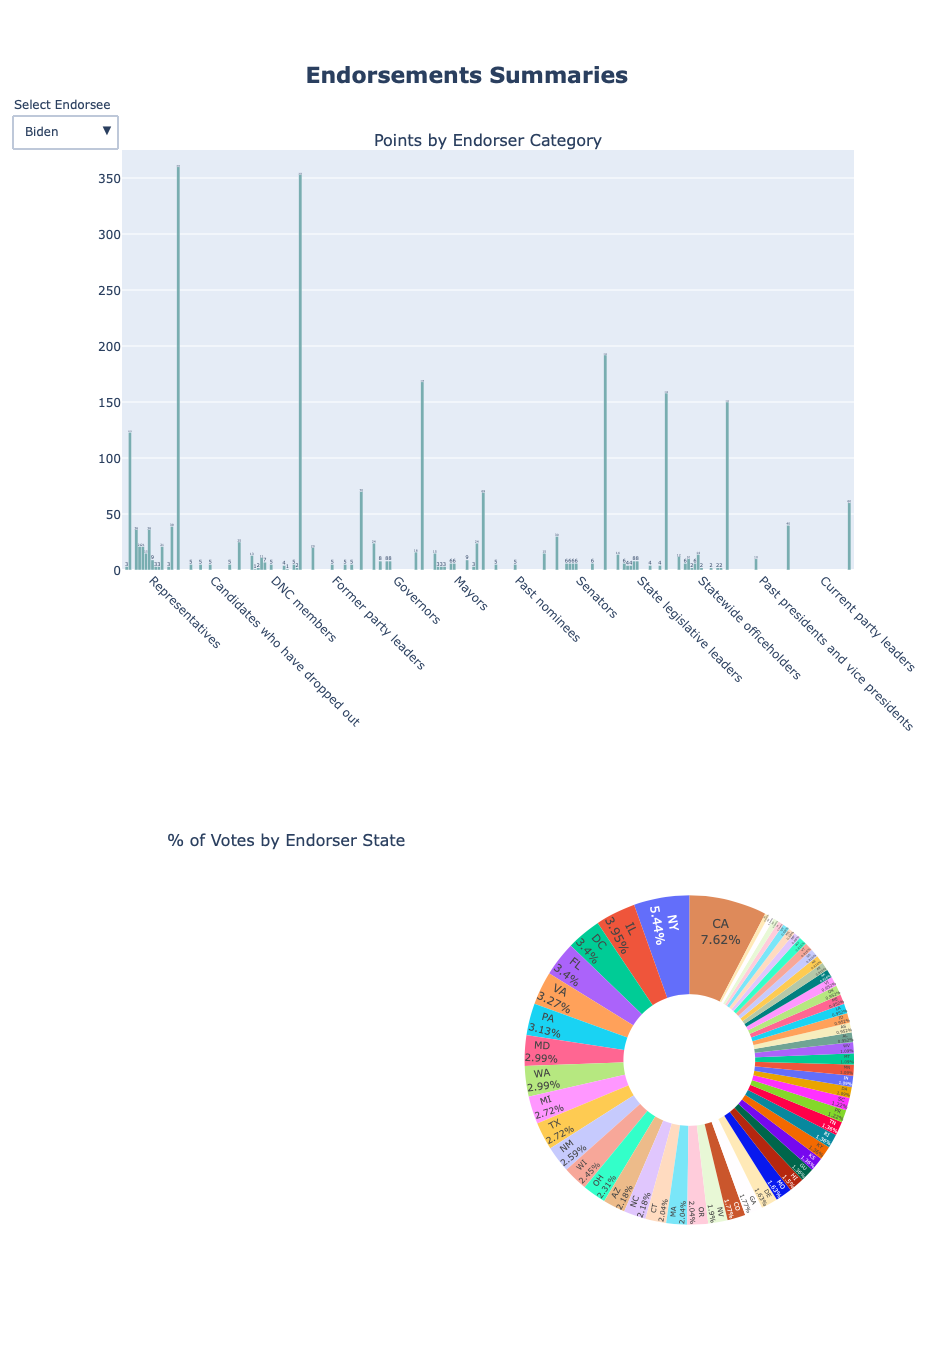

In [253]:
plot_3 = make_subplots(
    rows=2, cols=2,
    specs=[[{'colspan':2}, None],
           [{}, {"type": "pie"}]],
    subplot_titles=('Points by Endorser Category', 
                    '% of Votes by Endorser State')
)

for i,endor in enumerate(endorsements_df['endorsee'].unique()):
        
    visible = [False]*l*n_plots
    
    visible[i*cols_len:(i+1)*cols_len] = [True]*cols_len

    
    plot_3.add_trace(
            go.Bar(
                x=cat_df.loc[cat_df['endorsee']==endor, 'category'],
                y=cat_df.loc[cat_df['endorsee']==endor, 'pt_by_category'],
                text=cat_df.loc[cat_df['endorsee']==endor, 'pt_by_category'],
                textposition='outside',
                opacity=0.9,
                marker={'color':colors[0],
                           'opacity':0.9},
                showlegend=False))
    
    plot_3.add_trace(
            go.Pie(
                values=state_df.loc[state_df['endorsee']==e, 'votes_by_state'].to_numpy(),
                labels=state_df.loc[state_df['endorsee']==e, 'state'].to_numpy(),
                hole=0.4,
                visible=False if i!=1 else True,
                text=state_df.loc[state_df['endorsee']==e, 'full_state'],
                hoverinfo='label+percent+name',
                textinfo= 'percent+label',
                textposition = 'inside',
                showlegend=False,
                marker = dict(colors = plotly.colors.diverging.Geyser)), row=2, col=2)
    
    buttons.append(
            dict(label=endor,
                    method='update',
                    args=[{'visible': visible},
                        #{'title': endor}
                        ]))
    

plot_3.update_layout(
    title={'text': '<b> Endorsements Summaries <b>', 'font':{'size':22},
            'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
    margin=dict(t=150),
    height=1350,
    xaxis1=dict(tickangle=45, tickvals=cat_df['category'].unique(), ticktext=cat_df['category'].unique()),
    yaxis1=dict(range=[0, np.max(cat_df['pt_by_category']+15)]),
    
    bargap=0.1,
    showlegend=True,
    updatemenus = list([
        dict(active=1,
             buttons=buttons,
             direction="down",
             pad={"r": 10, "t": 10},
             showactive=True,
             x=-0.15,
             xanchor="left",
             y=1.04,
             yanchor="top"
         )
     ]))

plot_3['layout']['annotations'] += go.layout.Annotation(text="Select Endorsee", 
                                                     x=-0.15, xref="paper", 
                                                     y=1.05, yref="paper",
                                                     align="left", showarrow=False),


plot_3.show()

In [254]:
# Slicing data by still running candidates

final_df = endorsements_df.groupby('endorsee').agg({'endorser': 'count', 'points': 'sum'})
final_df.rename(columns={'endorser': 'n_endorsements','points': 'total_points'},inplace=True)
final_df['points_endorser_ratio'] = np.round(np.divide(final_df['total_points'].to_numpy(), final_df['n_endorsements'].to_numpy()), 2)
final_df.reset_index(inplace=True)

In [255]:
final_df

,endorsee,n_endorsements,total_points,points_endorser_ratio
0,Bennet,5,18,3.60
1,Biden,86,261,3.03
2,Bloomberg,31,90,2.90
3,Booker,19,48,2.53
4,Bullock,2,7,3.50
5,Buttigieg,18,45,2.50
6,Castro,2,4,2.00
7,Delaney,1,3,3.00
8,Gillibrand,1,3,3.00
9,Harris,22,61,2.77


In [256]:
final_df = final_df.iloc[[0,1,4,6,12,14,16], :]
final_df

,endorsee,n_endorsements,total_points,points_endorser_ratio
0,Bennet,5,18,3.60
1,Biden,86,261,3.03
4,Bullock,2,7,3.50
6,Castro,2,4,2.00
12,O'Rourke,1,3,3.00
14,Sanders,28,60,2.14
16,Warren,34,90,2.65


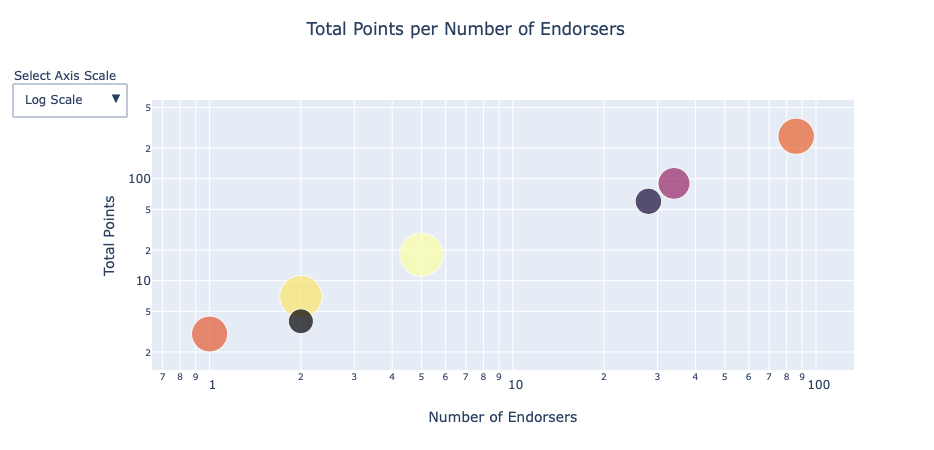

In [257]:
plot_4 = go.Figure()

plot_4.add_trace( 
        go.Scatter(
            x=final_df['n_endorsements'], 
            y=final_df['total_points'],
            mode='markers',
            marker=dict(
                size=(final_df['points_endorser_ratio']+3)**2,
                color=final_df["points_endorser_ratio"],
                colorscale='Inferno',
                opacity = 0.7),
            text=final_df['endorsee'],
            textposition='bottom right'
    ))

plot_4.update_layout(
        xaxis_type="log",
        yaxis_type="log",
        title={'text': 'Total Points per Number of Endorsers',
               'y':0.95, 'x':0.5,
               'xanchor': 'center', 'yanchor': 'top'},
        showlegend=False,
        xaxis_title_text='Number of Endorsers',
        yaxis_title_text='Total Points',
        updatemenus = list([
            dict(active=0,
                 buttons=list([
                    dict(label='Log Scale',
                         method='update',
                         args=[{'visible': True},
                               {'title': 'Log scale',
                                'xaxis': {'type': 'log'},
                                'yaxis': {'type': 'log'}}]),
                    dict(label='Log X',
                         method='update',
                         args=[{'visible': True},
                               {'title': 'Linear scale',
                                'xaxis': {'type': 'log'},
                                'yaxis': {'type': 'linear'}}]),
                    dict(label='Log Y',
                        method='update',
                       args=[{'visible': True},
                              {'title': 'Linear scale',
                               'xaxis': {'type': 'linear'},
                               'yaxis': {'type': 'log'}}]),
                    dict(label='Linear Scale',
                        method='update',
                       args=[{'visible': True},
                              {'title': 'Linear scale',
                               'xaxis': {'type': 'linear'},
                               'yaxis': {'type': 'linear'}}]),
                            ]),
                direction="down",
                pad={"r": 10, "t": 10},
                showactive=True,
                x=-0.2,
                xanchor="left",
                y=1.1,
                yanchor="top"
                )]),
        annotations=[
            go.layout.Annotation(text="Select Axis Scale", 
                                 x=-0.2, xref="paper", 
                                 y=1.13, yref="paper",
                                 align="left", showarrow=False),
        ])

plot_4.show()